In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
 # relationship between spending on advertising and sales
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head() # engineered feature

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


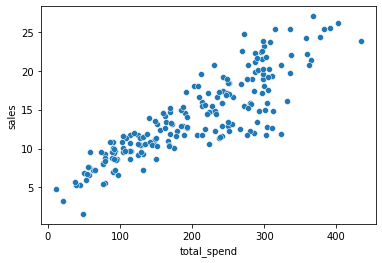

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

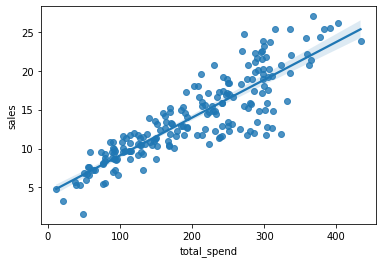

In [7]:
# using ordinary least squares
sns.regplot(data=df,x='total_spend',y='sales')

In [8]:
X = df['total_spend'] # feature matrix
y = df['sales']

In [10]:
# y = mx+b
# y = B1x + B0
#help(np.polyfit)

In [11]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [12]:
potential_spend = np.linspace(0,500,100)

In [15]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

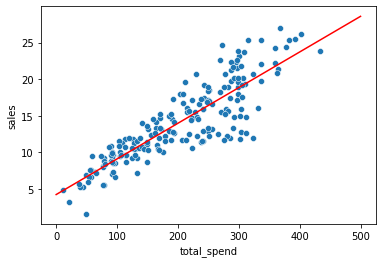

In [16]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [17]:
spend = 200
predicted_sale = 0.04868788*spend + 4.24302822

In [18]:
predicted_sale

13.98060422

In [19]:
# HOW DO WE MEASURE HOW ACCURATE THE MODEL IS?

In [22]:
coef = np.polyfit(X,y,3)
coef # x^3, x^2  coef are really small basically overfitting

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [23]:
# y = B1x + B0
# y = B3X**3 + B2X**2 + B1X + B0

In [24]:
pot_spend = np.linspace(0,500,100)
pre_sales = coef[0]*pot_spend**3 + coef[1]*pot_spend**2 + coef[2] * pot_spend + coef[3]

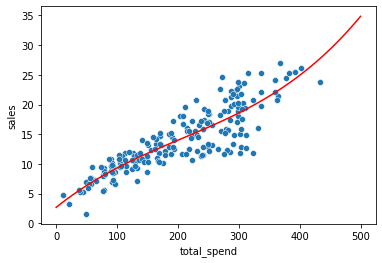

In [26]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend,pre_sales,color='red')

# Scikit-Learn
* uses a generalized "estimator API"
* this means the way algorithms are imported, fitted and used is uniform across all algorithms
* statsmodels python library if interested in more statistical descripton of models such as significance levels

In [28]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_tesy = tran_test_split(X, y)

# import model family from sklearn
from sklearn.model_family import ModelAlgo 
mymodel = ModelAlgo(param1, param2)
mymodel.fit(X_train, y_train)
predictions = mymodel.predict(X_test)

from sklearn.metrics import error_metric
performance = error_metric(y_test, predictions)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_tesy = tran_test_split(X, y)\n\n# import model family from sklearn\nfrom sklearn.model_family import ModelAlgo \nmymodel = ModelAlgo(param1, param2)\nmymodel.fit(X_train, y_train)\npredictions = mymodel.predict(X_test)\n\nfrom sklearn.metrics import error_metric\nperformance = error_metric(y_test, predictions)\n'

In [29]:
# Linear Regression with Scikit-learn
# simple linear regression - one feature
# linear regression - use all features
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


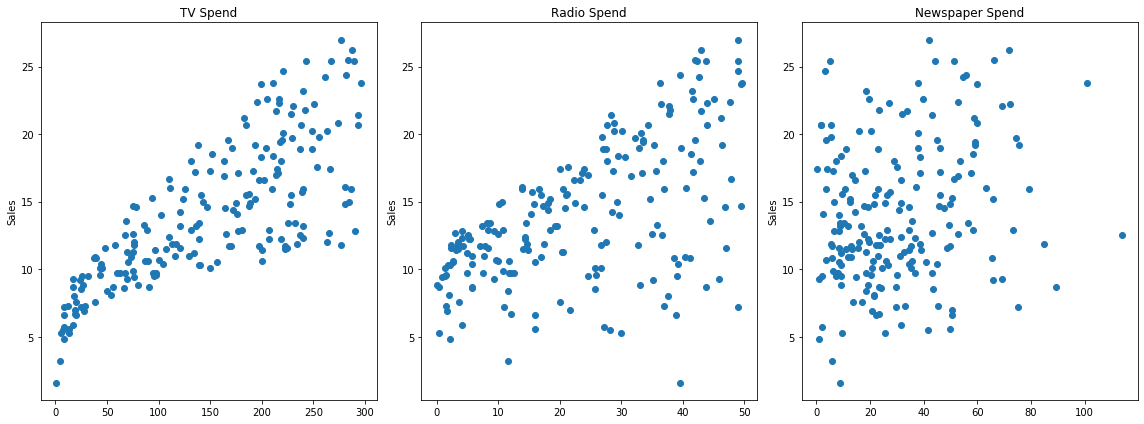

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

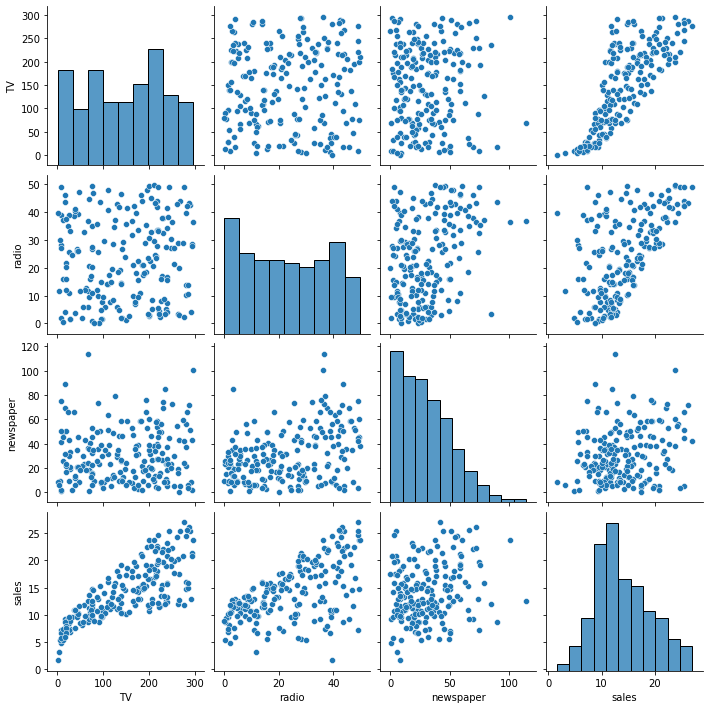

In [31]:
sns.pairplot(df)

In [32]:
X = df.drop("sales",axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [33]:
y = df['sales']

In [40]:
from sklearn.model_selection import train_test_split
# shuffles the array first if it was sorted or something
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [41]:
len(df)

200

In [42]:
len(X_train) # retains original index so its easy to match them up

140

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

# Evaluating regression
* Mean Absolute Eroor
    * wont punish large errors
* Mean Squared Error
    * larger errors are more punished
    * different units than y, reports back in units of y^2
* Root Mean Square Error
    * fixes both previous issues

In [51]:
test_predictions = model.predict(X_test)

In [52]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
df['sales'].mean()

14.022500000000003

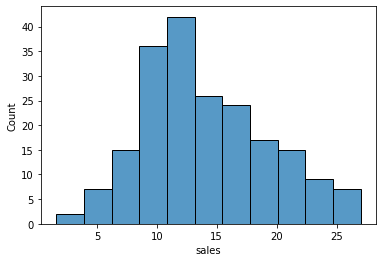

In [56]:
sns.histplot(data=df,x='sales')

In [57]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [60]:
# without sqrt its variance
np.sqrt(mean_squared_error(y_test,test_predictions)) # standard deviation

1.5161519375993877

# Residuals

In [61]:
test_residuals = y_test-test_predictions

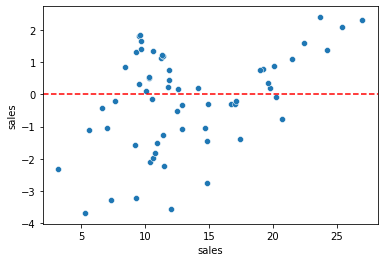

In [66]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

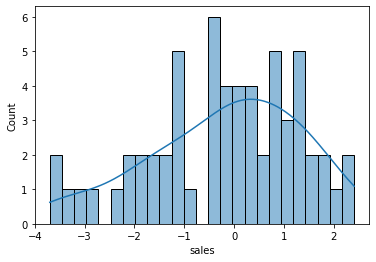

In [68]:
sns.histplot(test_residuals,bins=25,kde=True)

# Model Deployment

In [69]:
final_model = LinearRegression()

In [70]:
# fit it on the entire data
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [73]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [74]:
from joblib import dump,load

In [75]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [76]:
loaded_model = load('final_sales_model.joblib')

In [78]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [79]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149,22,12]]

In [80]:
loaded_model.predict(campaign)

array([13.893032])

# Polynomial Regression
* interaction term
* non-linear behaviour

In [81]:
X = df.drop('sales',axis=1)

In [82]:
y = df['sales']

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [85]:
polynomial_converter.fit(X)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [90]:
poly_features = polynomial_converter.transform(X)

In [91]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [92]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model = LinearRegression()

In [97]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
test_predictions = model.predict(X_test)

In [99]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
MAE = mean_absolute_error(y_test,test_predictions)

In [103]:
MSE = mean_squared_error(y_test,test_predictions)

In [104]:
RMSE = np.sqrt(MSE)

In [105]:
MAE

0.48967980448037

In [106]:
RMSE

0.6646431757269196

# Choosing Degree of Polynomial
* bias variance trade-off

In [109]:
# creatae the different order polynomial\
# split poly features into train/tst
# fit on train
# save RMSE for BOTH train AND test set
# PLOT results (error vs poly order)

In [113]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    poly_coverter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_coverter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [114]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.43393443569020707,
 0.35170836883993434,
 0.25093429445297893,
 0.2064057066657382,
 5.421198831242886,
 0.1413487891319594,
 0.16770295015329578]

In [115]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825218081,
 0.5077742630714097,
 2.5758292138029795,
 4.496551702875224,
 1380.960053669599,
 4365.642468047107,
 95162.52861525075]

[]

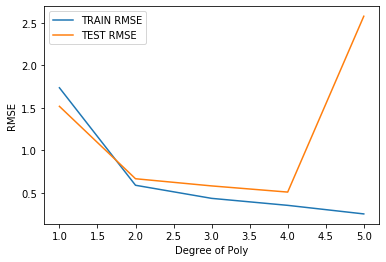

In [119]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN RMSE")
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel("Degree of Poly")
plt.ylabel("RMSE")
plt.legend()
plt.plot()

# Model Deployment
* save feature converter and model

In [121]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [122]:
final_model = LinearRegression()

In [123]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
from joblib import dump,load

In [125]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [126]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [134]:
loaded_converter = load("final_converter.joblib")
loaded_model = load("final_poly_model.joblib")

In [135]:
campaign = [[149,22,12]]

In [136]:
transformed_data = loaded_converter.fit_transform(campaign)
transformed_data.shape

(1, 19)

In [137]:
loaded_model.predict(transformed_data)

array([14.64501014])

# Regularization
* L1, penalty equal to the absolute value of the magnitude of coefficients
    * limits the size of the coefficients
* L2, penalty is equal to the square of the magnitude of the coefficients
* L1 and L2
* introduce additional hyperparameters that needs to be tuned

# Feature scaling
* improves the convergence of steepest descent algorithm which do not possess property of scale invaraince
* two main ways:
    * standardization (mean of 0 and standard deviation of 1)/Z score normalization
    * normalization (rescale all data vales to be between 0-1
* .fit() mathod call calculates the neccessary stats (min,max,mean,stand dev)
* .transform() axtually scales the data

# Cross Validation
* more advanced method to split test-train data
* K fold cross validation
* train-validate-test set
* the validation data is what you are tuning your hyperparameter to

# Regularization for Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [10]:
X = df.drop('sales',axis=1)
y = df['sales']

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [15]:
poly_features = polynomial_converter.fit_transform(X)

In [16]:
X.shape

(200, 3)

In [17]:
poly_features.shape

(200, 19)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# every scaler function works from metrics like standard deviation and mean values
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train = scaler.transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

## L2 - Ridge Regression
* works by helping reduce the potential for ovefitting to the training data
* it does this by adding penalty term to the error that is based on the squared value of the coeffficients

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_model = Ridge(alpha=10)

In [28]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [32]:
test_predictions = ridge_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
MAE = mean_absolute_error(y_test,test_predictions)

In [35]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [36]:
from sklearn.linear_model import RidgeCV

In [45]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [46]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [47]:
ridge_cv_model.alpha_

0.1

In [48]:
from sklearn.metrics import SCORERS

In [44]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [49]:
 test_predictions = ridge_cv_model.predict(X_test)

In [50]:
MAE = mean_absolute_error(y_test,test_predictions)

In [51]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [52]:
MAE

0.4273774884326348

In [53]:
RMSE

0.6180719926918011

In [54]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# L1 Lasso Regression

In [57]:
from sklearn.linear_model import LassoCV

In [60]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=1000000)

In [62]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [63]:
lasso_cv_model.alpha_

0.004943070909225827

In [65]:
test_predictions = lasso_cv_model.predict(X_test)

In [66]:
MAE = mean_absolute_error(y_test,test_predictions)

In [67]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [68]:
MAE

0.4335034618590082

In [69]:
RMSE

0.6063140748984048

In [70]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# L1 and L2 Elastic Net

In [72]:
from sklearn.linear_model import ElasticNetCV

In [79]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,1],
                             eps=0.001,n_alphas=100,max_iter=10000000,cv=5)

In [80]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=10000000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [82]:
elastic_model.l1_ratio_

1.0

In [84]:
test_predictions = elastic_model.predict(X_test)

In [85]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

0.4335034618590082

In [86]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.6063140748984048